# **MÓDULO 15 - Exercício**
# Análise  - A segunda etapa da Pré Modelagem

# 1) O primeiro exercício é o de salvar a base que criaram na atividade do módulo anterior em csv e abrir ela neste arquivo.
Igual fizemos no início do módulo atual no início da primeira aula.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
df = pd.read_csv('CHURN_TELECON_02.csv')

In [3]:
df.head()

,Unnamed: 0,Genero,Idoso,Casado,Dependentes,Tempo_como_Cliente,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,Metodo_Pagamento,Pagamento_Mensal,Total_Pago,Churn
0,0,FEMALE,0,Yes,No,1,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,1,MALE,0,No,No,34,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,2,MALE,0,No,No,2,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,3,MALE,0,No,No,45,DSL,Yes,Yes,No,One year,Bank transfer (automatic),71.45,1840.75,No
4,16,FEMALE,0,No,No,52,No,No internet service,No internet service,No internet service,One year,Mailed check,71.45,1022.95,No


# 2) Comece pela análise univariada:

A) Utilize a função describe no seu dataframe, veja os insights que consegue retirar.

B) Já é possível identificar variáveis com possíveis outliers? Se sim, quais?

C) Plot gráficos que considerar importante para completar sua análise univariada. (Lembrando que sua variável preditora é o churn). Não se esqueça de trazer insights de cada gráfico plotado. Utilize pelo menos 4 variáveis distintas.

D) Verifique se os dados das variáveis Booleanas são balanceados ou não.

In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
df.describe()

,Idoso,Tempo_como_Cliente,Pagamento_Mensal,Total_Pago
count,2488.000000,2488.000000,2488.000000,2488.000000
mean,0.161576,32.352090,66.342564,2290.087178
std,0.368135,24.636885,28.051718,2264.585643
min,0.000000,0.000000,18.400000,18.800000
25%,0.000000,8.000000,45.400000,402.337500
50%,0.000000,29.000000,71.450000,1402.900000
75%,0.000000,56.000000,87.712500,3867.162500
max,1.000000,72.000000,118.650000,8564.750000


A variável **Idoso**, apesar de ser númerica, é booleana, por isso analisar através do "describe" não é a melhor forma.  
  
Observando a variável **Tempo_como_Cliente** percebemos que o mínimo dela é 0, mas o máximo é 72. Verificando a distribuição temos 8 no 25% e 29 no 50%, todo o restante se concentrando no 56%. Ainda assim, o 50% não está tão distante do valor da média, o que pode significar uma distribuição próxima ao normal.
  
Em **Pagamento_Mensal** temos um mínimo muito distante do máximo. Conferimos esse mesmo comportamento na variável **Total_Pago**. Tal comportamento pode indicar a presença de outliers nessas variáveis, fazendo necessário uma verificação.  
  
Lembrando que a váriável **Total_Pago** é uma consequência da relação entre as variáveis **Tempo_como_Cliente** e **Pagamento_Mensal**.

In [6]:
(df['Tempo_como_Cliente'] == 0). sum()

np.int64(5)

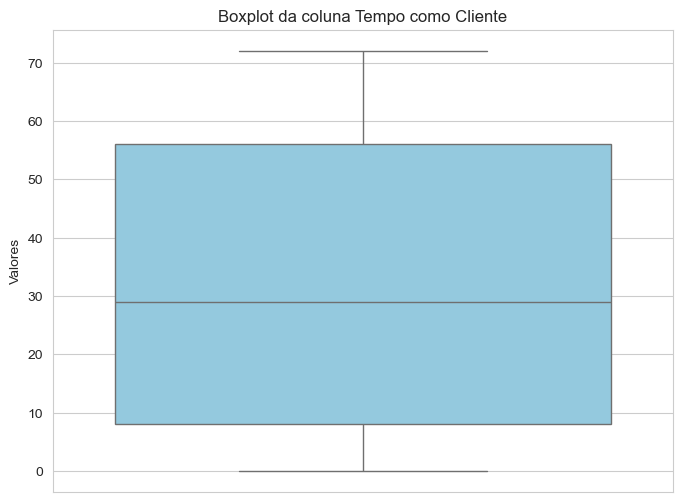

In [7]:
sns.set_style('whitegrid')

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Tempo_como_Cliente', color='skyblue')
plt.title('Boxplot da coluna Tempo como Cliente')
plt.ylabel('Valores')
plt.show()

Ao plotar o boxplot verificamos que ele inícia no zero, mas o restante dos dados fica bem distribuído e sem a presença de outliers.

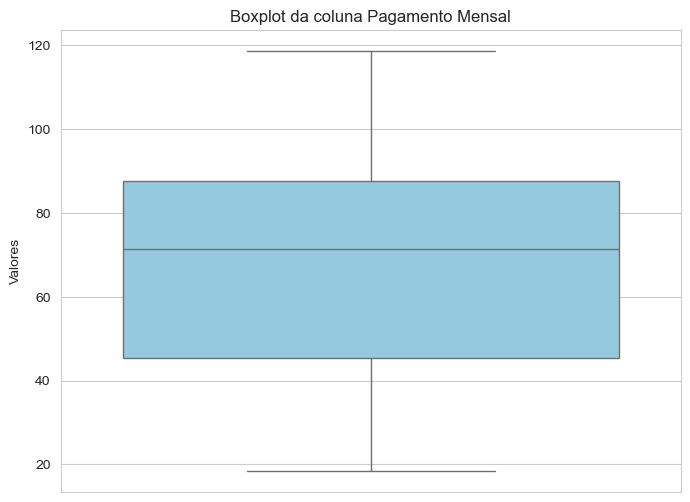

In [8]:
sns.set_style('whitegrid')

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Pagamento_Mensal', color='skyblue')
plt.title('Boxplot da coluna Pagamento Mensal')
plt.ylabel('Valores')
plt.show()

Em **Pagamento_Mensal** não identificamos a presença de outliers, mas sim valores distribuídos. tal fato já era esperado, pois o 50% (71,45) é próximo a média (66,34).

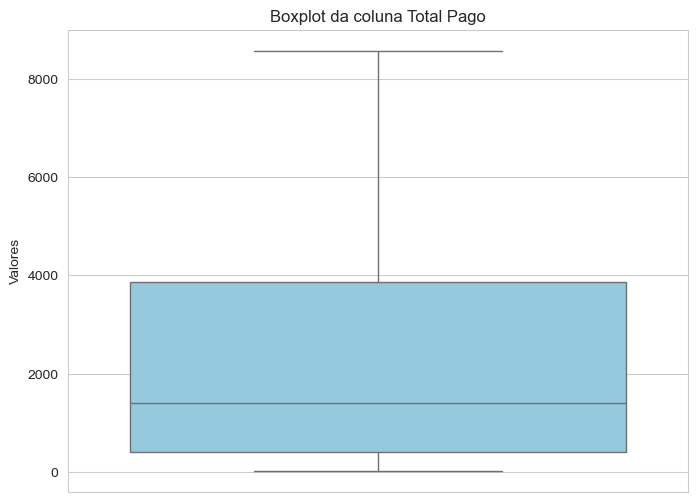

In [9]:
sns.set_style('whitegrid')

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Total_Pago', color='skyblue')
plt.title('Boxplot da coluna Total Pago')
plt.ylabel('Valores')
plt.show()

Na coluna **Total_Pago** não há a presença de outliers, mas verificamos uma concentração maior de valores no Q3. 

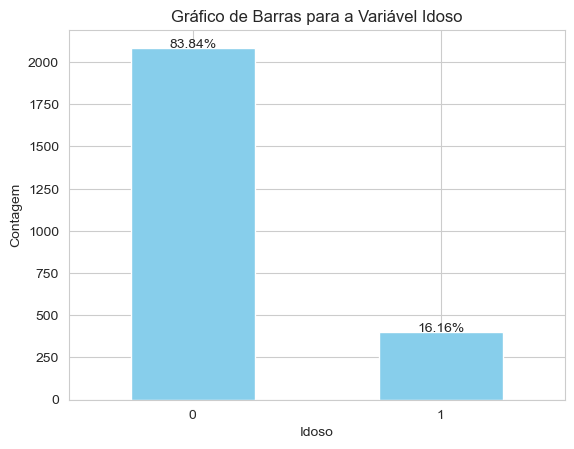

In [10]:
contagem_idoso = df['Idoso'].value_counts()

porgentagem_idoso = (contagem_idoso / contagem_idoso.sum()) * 100

ax = contagem_idoso.plot(kind='bar', color='skyblue')
for i, v in enumerate(contagem_idoso):
    ax.text(i, v + 1, f'{porgentagem_idoso.iloc[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Idoso')
plt.xlabel('Idoso')
plt.ylabel('Contagem')
plt.xticks(rotation = 1)
plt.show()

A váriável **Idoso** possui uma concentração maior no 0 (não idoso), isso pode significar que futuramente o modelo poderá prever melhor os casos de churn em "não idoso", mas não terá a mesma assertividade para os casos de "idoso".

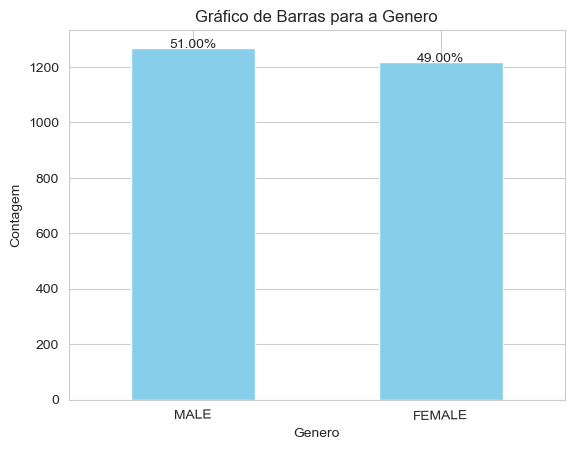

In [11]:
contagem_genero = df['Genero'].value_counts()

porgentagem_genero = (contagem_genero / contagem_genero.sum()) * 100

ax = contagem_genero.plot(kind='bar', color='skyblue')
for i, v in enumerate(contagem_genero):
    ax.text(i, v + 1, f'{porgentagem_genero.iloc[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Genero')
plt.xlabel('Genero')
plt.ylabel('Contagem')
plt.xticks(rotation = 1)
plt.show()

A variável **Genero** é balanceada, já que as duas colunas são de valores bem próximos. 

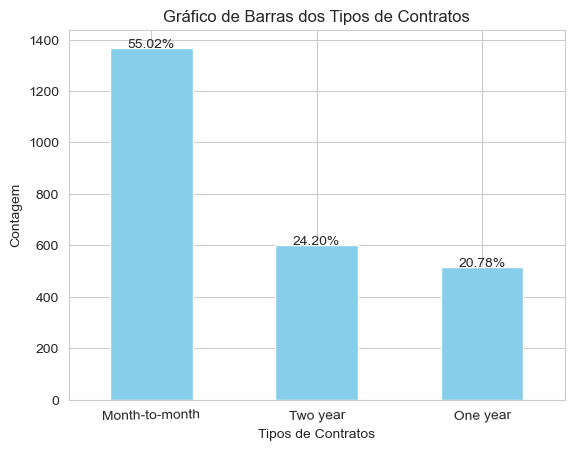

In [12]:
contagem_tipo_contrato = df['Tipo_Contrato'].value_counts()

porgentagem_tipo_contrato = (contagem_tipo_contrato / contagem_tipo_contrato.sum()) * 100

ax = contagem_tipo_contrato.plot(kind='bar', color='skyblue')
for i, v in enumerate(contagem_tipo_contrato):
    ax.text(i, v + 1, f'{porgentagem_tipo_contrato.iloc[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras dos Tipos de Contratos')
plt.xlabel('Tipos de Contratos')
plt.ylabel('Contagem')
plt.xticks(rotation = 1)
plt.show()

Na variável **Tipos_de_Contratos**, há uma concentração maior de contratos mensais e uma distribuição semelhante entre os contratos anuais e bianuais. 

# 3) Identifique e trate as colunas que contém outliers.
Caso opte por mante-los ou altera-los justifique sua escolha.


**Não** foram localizadas variáveis com outliers. 

# 4) Realize a etapa da análise bivariada:
A) Questione pelo menos 5 informações e traga as respostas utilizando visuais gráficos e insights.


B) Quais variáveis você acredita serem as mais importantes para esse projetos relacionadas a variável Churn?

- Há uma relação entre casado e tipos de contratos?

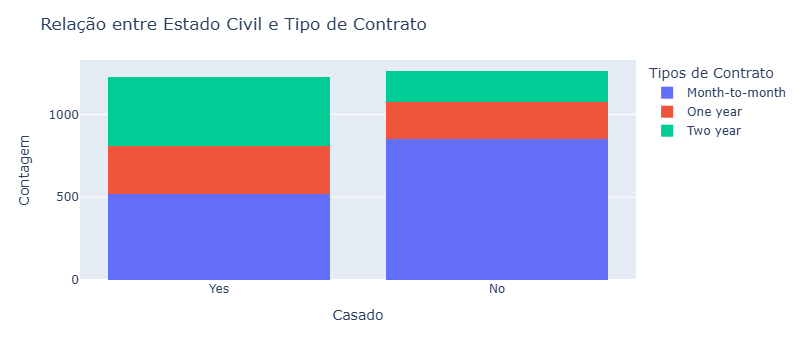

In [13]:
fig = px.histogram(df, x='Casado', color='Tipo_Contrato', barmode='stack')

fig.update_layout(title='Relação entre Estado Civil e Tipo de Contrato',
                  xaxis_title= 'Casado',
                  yaxis_title= 'Contagem',
                  legend_title= 'Tipos de Contrato')
fig.show()

- Tempo como cliente se relaciona com a variável churn?

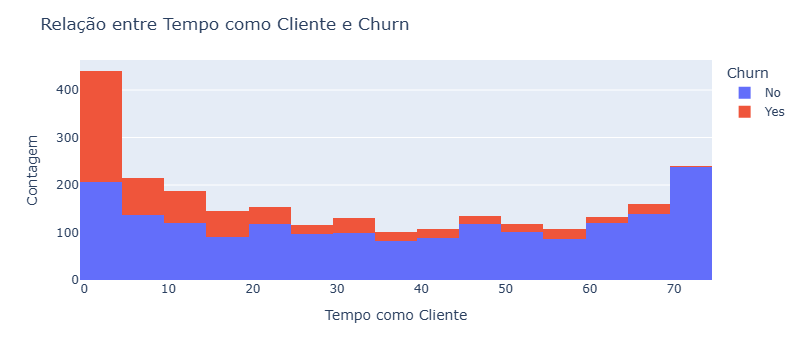

In [14]:
fig = px.histogram(df, x='Tempo_como_Cliente', color='Churn', barmode='stack')

fig.update_layout(title='Relação entre Tempo como Cliente e Churn',
                  xaxis_title= 'Tempo como Cliente',
                  yaxis_title= 'Contagem',
                  legend_title= 'Churn')
fig.show()

- Suporte técnico se relaciona com a variável serviço de internet?

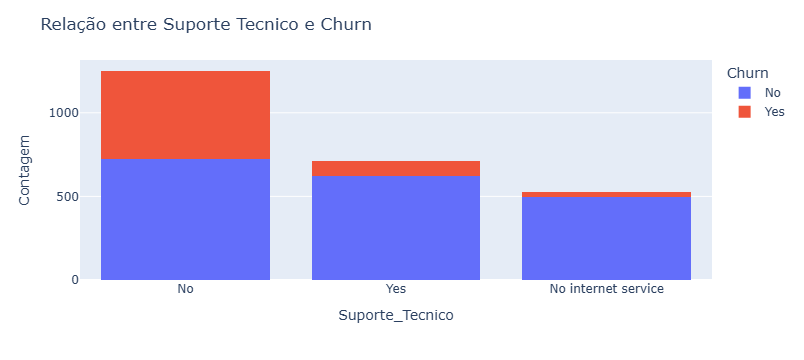

In [15]:
fig = px.histogram(df, x='Suporte_Tecnico', color='Churn', barmode='stack')

fig.update_layout(title='Relação entre Suporte Tecnico e Churn',
                  xaxis_title= 'Suporte_Tecnico',
                  yaxis_title= 'Contagem',
                  legend_title= 'Churn')
fig.show()

- Há uma propênção maior ao Churn em idosos?

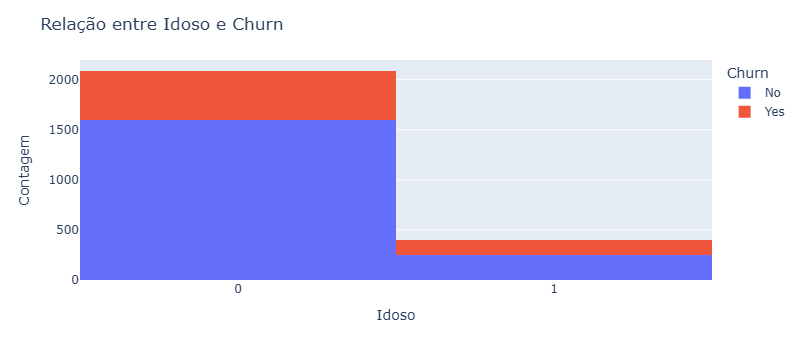

In [16]:
fig = px.histogram(df, x='Idoso', color='Churn', barmode='stack')

fig.update_layout(title='Relação entre Idoso e Churn',
                  xaxis_title= 'Idoso',
                  yaxis_title= 'Contagem',
                  legend_title= 'Churn')
fig.show()

- Genêro possui relação com a váriável tempo como cliente?

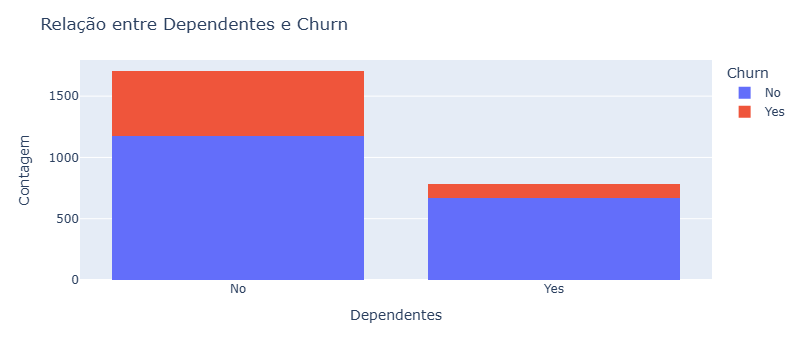

In [17]:
fig = px.histogram(df, x='Dependentes', color='Churn', barmode='stack')

fig.update_layout(title='Relação entre Dependentes e Churn',
                  xaxis_title= 'Dependentes',
                  yaxis_title= 'Contagem',
                  legend_title= 'Churn')
fig.show()

As váriáveis mais relvantes que localizei foram:
- Dependentes;
- Suporte Tecnico;
- Tempo como Cliente.

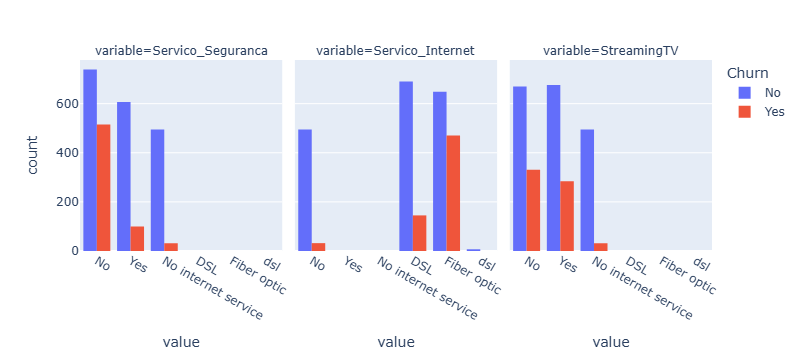

In [21]:
df_melt = df.melt(id_vars=['Churn'], value_vars=['Servico_Seguranca', 'Servico_Internet', 'StreamingTV'])

fig = px.histogram(df_melt, x='value', color='Churn', facet_col='variable', barmode='group')

fig.show()